In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
data = pd.read_csv("SMSSpamCollection.txt", sep = "\t", names=["Heading", "message"])

In [3]:
#data.shape
#data.sample(5)
#data.head()
data.tail()

,Heading,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
data['Heading'].value_counts()

ham     4825
spam     747
Name: Heading, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
data['Heading']=encoder.fit_transform(data['Heading'])

data.head()

,Heading,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.isnull().sum()

Heading    0
message    0
dtype: int64

In [7]:
data.duplicated().sum()

403

In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [9]:
data.shape

(5169, 2)

In [10]:
data['Heading'].value_counts()

0    4516
1     653
Name: Heading, dtype: int64

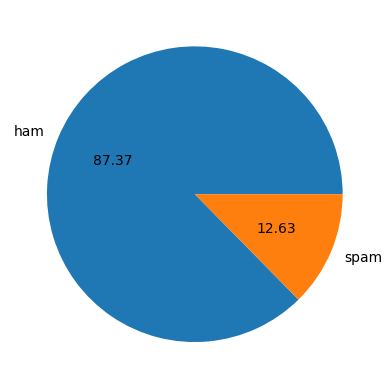

In [11]:
plt.pie(data['Heading'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [12]:
data['num_characters']=data['message'].apply(len)
data.head()

,Heading,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
data['num_words']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,Heading,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
data['num_sentences']=data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,Heading,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [15]:
data[data['Heading']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [16]:
data[data['Heading']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

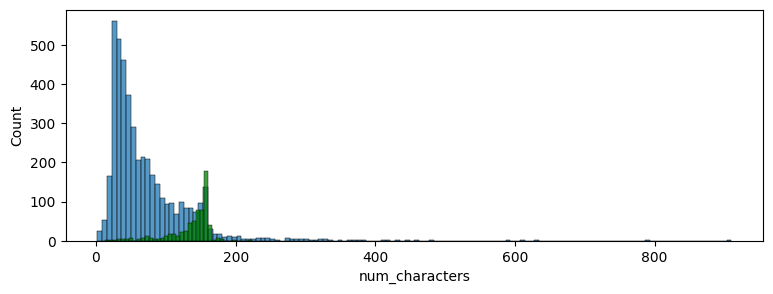

In [17]:
plt.figure(figsize=(9,3))
sns.histplot(data[data['Heading']==0]['num_characters'])
sns.histplot(data[data['Heading']==1]['num_characters'],color = 'green')

<Axes: xlabel='num_words', ylabel='Count'>

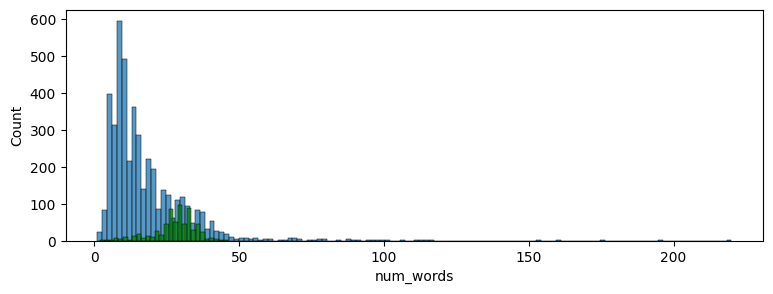

In [18]:
plt.figure(figsize=(9,3))
sns.histplot(data[data['Heading']==0]['num_words'])
sns.histplot(data[data['Heading']==1]['num_words'],color='green')

<Axes: xlabel='num_sentences', ylabel='Count'>

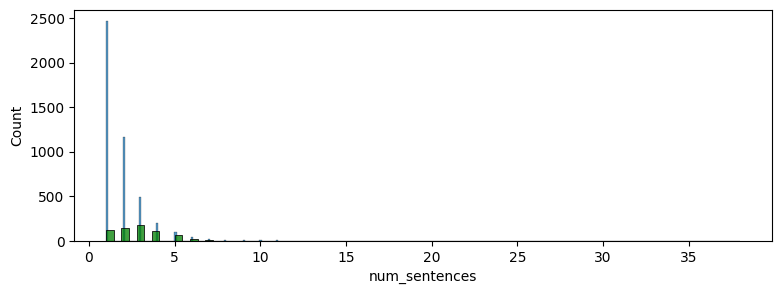

In [19]:
plt.figure(figsize=(9,3))
sns.histplot(data[data['Heading']==0]['num_sentences'])
sns.histplot(data[data['Heading']==1]['num_sentences'],color='green')

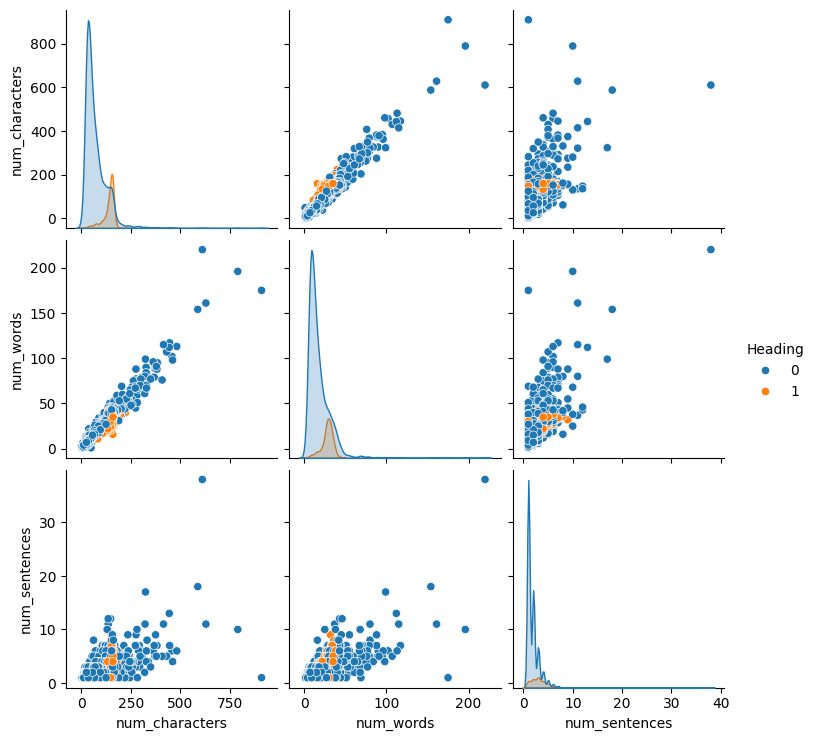

In [20]:
sns.pairplot(data,hue='Heading')

<ipython-input-21-510a64bed407>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

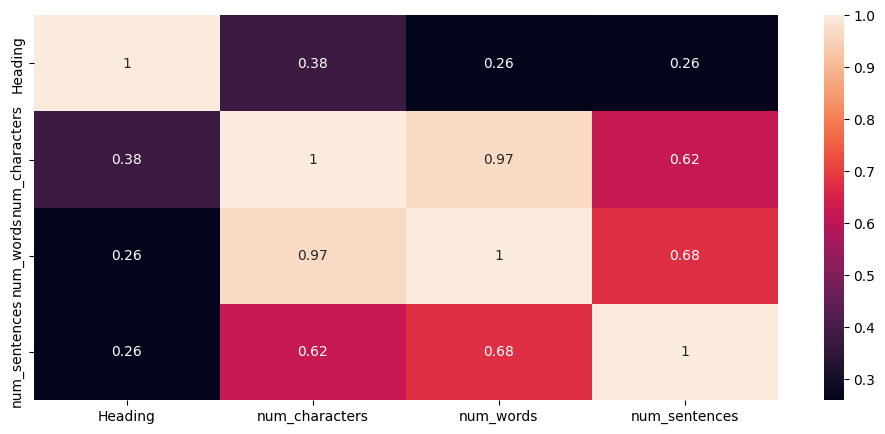

In [21]:
plt.figure(figsize = (12,5))
sns.heatmap(data.corr(),annot=True)

In [22]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
import string
string.punctuation
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    num=[]

    for i in text:
      if i.isalnum():
          num.append(i)
    text=num[:]
    num.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        num.append(i)
    text=num[:]
    num.clear()

    for i in text:
      num.append(ps.stem(i))
    return " ".join(num)

data['transformed_text'] = data['message'].apply(transform_text)

In [24]:
data.head()

,Heading,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


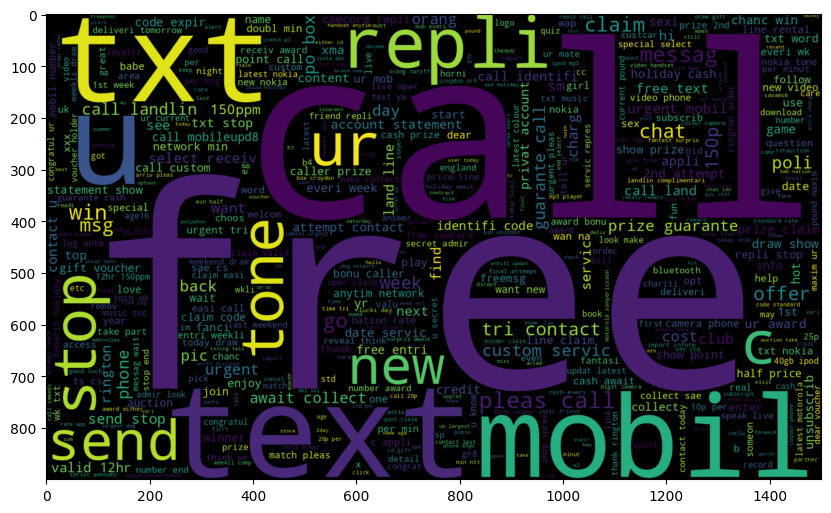

In [25]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 1500, height = 900,min_font_size=10, max_words = 2500)
span_wc = wc.generate(data[data['Heading']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize = (10, 11))
plt.imshow(span_wc, interpolation='bilinear')

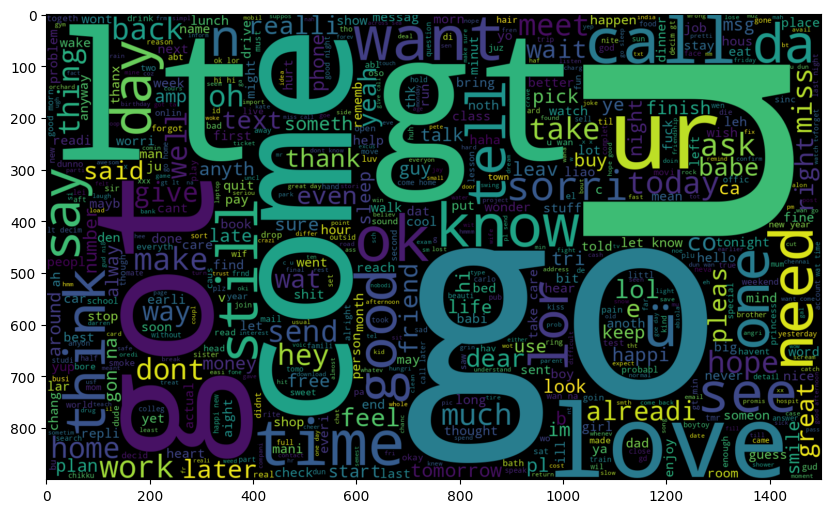

In [26]:
ham_wc = wc.generate(data[data['Heading']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize = (10, 11))
plt.imshow(ham_wc, interpolation='bilinear')

In [27]:
spam_corps = []
for message in data[data['Heading'] == 1]['transformed_text'].tolist():
    for words in message.split():
        spam_corps.append(words)

In [28]:
len(spam_corps)

9982

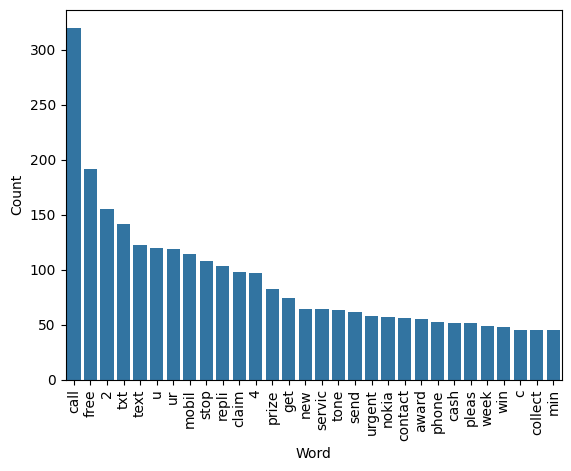

In [29]:
from collections import Counter
df = pd.DataFrame(Counter(spam_corps).most_common(30))
df.columns = ['Word', 'Count']
sns.barplot(y='Count', x='Word', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [30]:
ham_corps = []
for message in data[data['Heading'] == 0]['transformed_text'].tolist():
    for words in message.split():
        ham_corps.append(words)

In [31]:
len(ham_corps)

35939

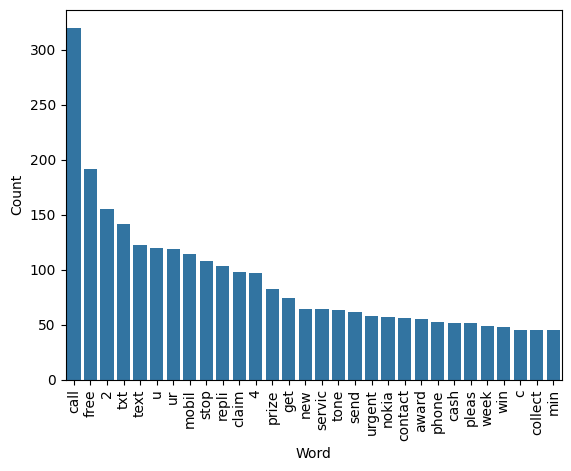

In [32]:
from collections import Counter
df = pd.DataFrame(Counter(spam_corps).most_common(30))
df.columns = ['Word', 'Count']
sns.barplot(y='Count', x='Word', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(data['transformed_text']).toarray()
X.shape

(5169, 6782)

In [34]:
y=data['Heading'].values
y.shape

(5169,)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[794 114]
 [ 21 105]]
0.4794520547945205


In [37]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[891  17]
 [ 16 110]]
0.8661417322834646


In [38]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.965183752417795
[[903   5]
 [ 31  95]]
0.95


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features=3000)
X=tfid.fit_transform(data['transformed_text']).toarray()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [40]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8617021276595744
[[788 120]
 [ 23 103]]
0.4618834080717489


In [41]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9690522243713733
[[908   0]
 [ 32  94]]
1.0


In [42]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748549323017408
[[906   2]
 [ 24 102]]
0.9807692307692307


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [44]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [45]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [46]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [47]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738878143133463, 0.9900990099009901)

In [48]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9900990099009901
For  KN
Accuracy -  0.9187620889748549
Precision -  1.0
For  NB
Accuracy -  0.9690522243713733
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9468085106382979
Precision -  0.9176470588235294
For  RF
Accuracy -  0.9671179883945842
Precision -  0.9693877551020408
For  AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.9333333333333333
For  BgC
Accuracy -  0.9671179883945842
Precision -  0.8898305084745762
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9811320754716981
For  GBDT
Accuracy -  0.9429400386847195
Precision -  0.9240506329113924
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9591836734693877


In [49]:
performance_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df1

,Algorithm,Accuracy,Precision
8,ETC,0.976789,0.981132
0,SVC,0.973888,0.990099
2,NB,0.969052,1.000000
5,RF,0.967118,0.969388
7,BgC,0.967118,0.889831
6,AdaBoost,0.966151,0.933333
10,xgb,0.965184,0.959184
4,LR,0.946809,0.917647
9,GBDT,0.942940,0.924051
3,DT,0.937137,0.821053


In [50]:
performance_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df2

,Algorithm,Accuracy,Precision
1,KN,0.918762,1.000000
2,NB,0.969052,1.000000
0,SVC,0.973888,0.990099
8,ETC,0.976789,0.981132
5,RF,0.967118,0.969388
10,xgb,0.965184,0.959184
6,AdaBoost,0.966151,0.933333
9,GBDT,0.942940,0.924051
4,LR,0.946809,0.917647
7,BgC,0.967118,0.889831


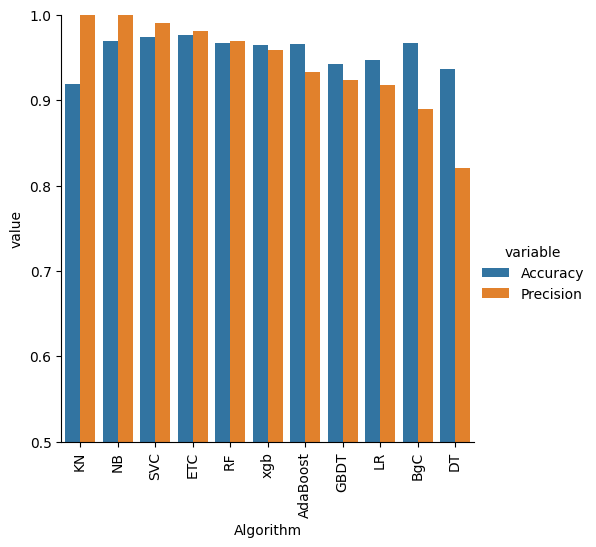

In [51]:
performance_df3 = pd.melt(performance_df2, id_vars = "Algorithm")
#performance_df3
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df3, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [55]:
performance_df2.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.918762,1.000000,0.918762,1.000000
1,NB,0.969052,1.000000,0.969052,1.000000
2,SVC,0.973888,0.990099,0.973888,0.990099
3,ETC,0.976789,0.981132,0.976789,0.981132
4,RF,0.967118,0.969388,0.967118,0.969388
5,xgb,0.965184,0.959184,0.965184,0.959184
6,AdaBoost,0.966151,0.933333,0.966151,0.933333
7,GBDT,0.942940,0.924051,0.942940,0.924051
8,LR,0.946809,0.917647,0.946809,0.917647
9,BgC,0.967118,0.889831,0.967118,0.889831


In [59]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))